# Plot annual IMS cubes over Canada

In [1]:
import sys
sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/Visualization/Utilities')
import Viz_Utils as vutil

sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/DataAccess/Utilities')
import PreProcess_Utils as pputil

In [2]:
# from dask.distributed import LocalCluster
# cluster = LocalCluster(n_workers = 10, threads_per_worker = 10) # Refined through testing
# client = cluster.get_client()
# client # Can open in other window by clicking 'Dashboard' link below

In [3]:
year = 2018
path = 'D:/Canada/IMS/IMS_'+ str(year) + '.nc'
path

'D:/Canada/IMS/IMS_2018.nc'

In [4]:
%%time
ims = pputil.uploadNC(path, form = 'dataarray', chunks = {'time': 1, 'band': -1, 'x': -1, 'y': -1})
ims = pputil.loadXR(ims[105:119,:,:])
ims

[########################################] | 100% Completed | 626.18 ms
CPU times: total: 2.61 s
Wall time: 3.68 s


<xarray.DataArray (time: 14, y: 4568, x: 5372)> Size: 344MB
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)
Coordinates:
  * x            (x) float64 43kB -2.351e+06 -2.35e+06 ... 3.019e+06 3.02e+06
  * y            (y) float64 37kB 3.843e+06 3.842e+06 ... -7.229e+05 -7.239e+05
    variable     <U18 72B 'IMS_Surface_Values'
  * time         (time) datetime64[ns] 112B 2018-04-16 2018-04-17 ... 2018-04-29
    spatial_ref  int64 8B 0
Attributes: (12/50)
    _FillValue:                 0
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NESDIS Interactive Multisensor Snow and ...
    summary:                    This file contains a map of snow cover and ic...
    keywords:                   EARTH SCIENCE > CRYOSPHERE > SEA ICE > ICE EX...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Ke...
    ...                         ...
    metadata_link:              https://nsidc.org/data/G02156
    naming_authority:           org.nsidc
    references:                 Ramsay, B. H. (1998). The interactive multise...
    history:                    05 August 2021 17:38Z: NetCDF file generated ...
    source:                     Analysts at the United States National Ice Ce...
    comment:                    The IMS product has changed versions and reso...

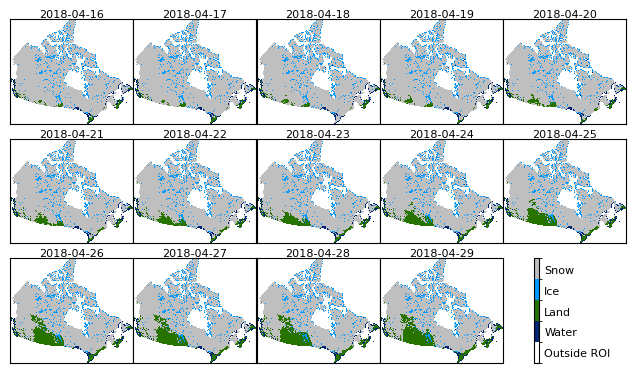

CPU times: total: 2min
Wall time: 2min 3s


In [5]:
%%time
vutil.matrixPlot(ims, form = 'ims', save = 'Figure S7.tif')